# Bike Sharing in the Bay Area

We end this chapter by using all the methods we have learned to examine a new and large dataset. We will also introduce `map_table`, a powerful visualization tool.

The [Bay Area Bike Share](http://www.bayareabikeshare.com/) service published a [dataset](http://www.bayareabikeshare.com/open-data) describing every bicycle rental from September 2014 to August 2015 in their system. There were 354,152 rentals in all. The columns are:

- An ID for the rental
- Duration of the rental, in seconds
- Start date
- Name of the Start Station and code for Start Terminal
- Name of the End Station and code for End Terminal
- A serial number for the bike
- Subscriber type and zip code

Credit: this notebook is adapted from: [Chapter 8.5 - Computational and Inferential Thinking: The Foundations of Data Science](https://inferentialthinking.com/chapters/08/5/Bike_Sharing_in_the_Bay_Area.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_data = '../datasets/trip/'

trips = pd.read_csv(path_data + 'trip.csv')
trips.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


We'll focus only on the *free trips*, which are trips that last less than 1800 seconds (half an hour). There is a charge for longer trips.

The histogram below shows that most of the trips took around 10 minutes (600 seconds) or so. Very few took near 30 minutes (1800 seconds), possibly because people try to return the bikes before the cutoff time so as not to have to pay.

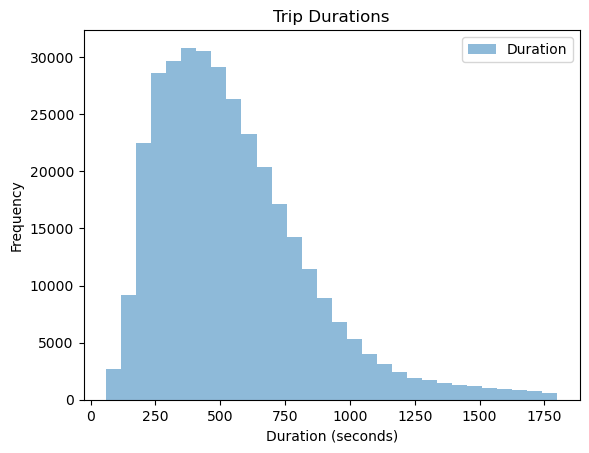

In [12]:
commute = trips[trips['Duration'] < 1800]
commute.plot.hist(y='Duration', bins=30, title='Trip Durations', alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.show()

We can get more detail by specifying a larger number of bins. But the overall shape doesn't change much.

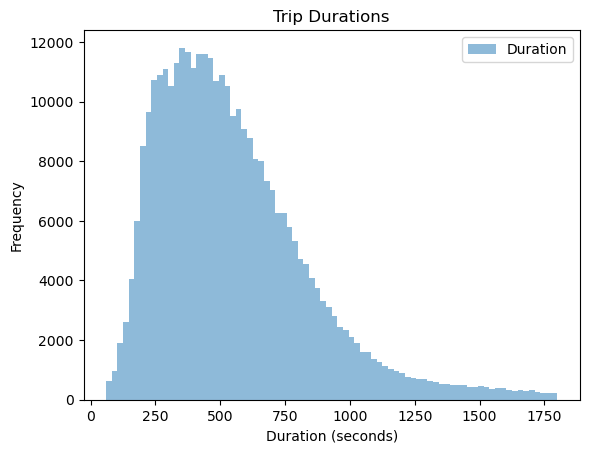

In [16]:
commute = trips[trips['Duration'] < 1800]
commute.plot.hist(y='Duration', bins=80, title='Trip Durations', alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.show()

## Exploring the Data with `group` and `pivot`

We can use `group` to identify the most highly used Start Station:

In [17]:
starts = commute.groupby('Start Station').size().reset_index(name='count').sort_values(by='count', ascending=False)
starts.head()

,Start Station,count
49,San Francisco Caltrain (Townsend at 4th),25858
50,San Francisco Caltrain 2 (330 Townsend),21523
23,Harry Bridges Plaza (Ferry Building),15543
65,Temporary Transbay Terminal (Howard at Beale),14298
2,2nd at Townsend,13674


The largest number of trips started at the Caltrain Station on Townsend and 4th in San Francisco. People take the train into the city, and then use a shared bike to get to their next destination.

### Count the number of trips, for each start and end stations

The `group` method can also be used to classify the rentals by both Start Station and End Station.

In [52]:
start_end = commute.groupby(['Start Station', 'End Station']).size()
start_end.head()

Start Station  End Station      
2nd at Folsom  2nd at Folsom         54
               2nd at South Park    295
               2nd at Townsend      437
               5th at Howard        113
               Beale at Market      127
dtype: int64

Note that `groupby` results in multi-indexed DataFrame where `' 'Start Station'` and `'End Station'` are the 1st level, and 2nd level indexes respectively.

In [53]:
start_end.index

MultiIndex([(                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            (                                '2nd at Folsom', ...),
            ...
            ('Yerba Buena Center of the Arts (3rd @ Howard)', ...),
            ('Yerba Buena Center of the Arts (3rd @ Howard)', ...),
            ('Yerba Buena Center of the Arts (3rd @ Howard)', ...),
            ('Yerba Buena Center of the Arts (3rd @ Howard)', ...),
            ('Yerba Buena Center

Let's use `reset_index` to convert the result of the `groupby` operation from a multi-indexed DataFrame to a regular DataFrame.

The `name='count'` ensures the aggregate-value column is given a name.

In [54]:
start_end = start_end.reset_index(name='count')
start_end.head()

,Start Station,End Station,count
0,2nd at Folsom,2nd at Folsom,54
1,2nd at Folsom,2nd at South Park,295
2,2nd at Folsom,2nd at Townsend,437
3,2nd at Folsom,5th at Howard,113
4,2nd at Folsom,Beale at Market,127


Fifty-four trips both started and ended at the station on 2nd at Folsom. A much large number (437) were between 2nd at Folsom and 2nd at Townsend.

### Using `pivot` to show all combinations

The `pivot` method does the same classification but displays its results in a contingency table that shows all possible combinations of Start and End Stations, even though some of them didn't correspond to any trips. Remember that the first argument of a `pivot` statement specifies the column labels of the pivot table; the second argument labels the rows.

There is a train station as well as a Bay Area Rapid Transit (BART) station near Beale at Market, explaining the high number of trips that start and end there.

In [55]:
pivot_table = commute.pivot_table(index='Start Station', columns='End Station', values='Duration', aggfunc='count', fill_value=0)
pivot_table.head()

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
Start Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,54,295,437,113,0,0,127,67,0,0,...,46,327,0,0,128,414,347,0,142,83
2nd at South Park,190,164,151,177,0,0,79,89,0,0,...,41,209,0,0,224,437,309,0,142,180
2nd at Townsend,554,71,185,148,0,0,183,279,0,0,...,50,407,0,0,1644,486,418,0,72,174
5th at Howard,107,180,92,83,0,0,59,119,0,0,...,102,100,0,0,371,561,313,0,47,90
Adobe on Almaden,0,0,0,0,11,7,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0


### Shortest Time

We can also use `pivot` to find the shortest time of the rides between Start and End Stations. Here `pivot` has been given `Duration` as the optional `values` argument, and `min` as the function which to perform on the values in each cell.

In [56]:
pivot_table_min = commute.pivot_table(index='Start Station', columns='End Station', values='Duration', aggfunc='min', fill_value=0)
pivot_table_min.head()

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
Start Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,61,61,137,215,0,0,219,351,0,0,...,673,154,0,0,219,112,399,0,266,145
2nd at South Park,97,60,67,300,0,0,343,424,0,0,...,801,219,0,0,322,195,324,0,378,212
2nd at Townsend,164,77,60,384,0,0,417,499,0,0,...,727,242,0,0,312,261,319,0,464,299
5th at Howard,268,86,423,68,0,0,387,555,0,0,...,383,382,0,0,384,279,330,0,269,128
Adobe on Almaden,0,0,0,0,84,305,0,0,0,0,...,0,0,409,0,0,0,0,0,0,0


Someone had a very quick trip (271 seconds, or about 4.5 minutes) from Beale at Market to 2nd at Folsom, about five blocks away. There are no bike trips between the 2nd Avenue stations and Adobe on Almaden, because the latter is in a different city.

## Drawing Maps
The table `stations` contains geographical information about each bike station, including latitude, longitude, and a "landmark" which is the name of the city where the station is located.

In [57]:
stations = pd.read_csv(path_data + 'station.csv')
stations.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


We can draw a map of where the stations are located, using `Marker.map_table`. The function operates on a table, whose columns are (in order) latitude, longitude, and an optional identifier for each point.

In [123]:
import folium

def plot_map(data, lat_col='lat', long_col='long', label_col=None):
    m = folium.Map(location=[data[lat_col].mean(), data[long_col].mean()], zoom_start=10)
    for idx, row in data.iterrows():
        if label_col:
            folium.Marker([row[lat_col], row[long_col]], popup=row[label_col]).add_to(m)
        else:
            folium.Marker([row[lat_col], row[long_col]]).add_to(m)
    return m

In [124]:
stations_map = plot_map(stations, lat_col='lat', long_col='long', label_col='name')
stations_map

The map is created using [OpenStreetMap](http://www.openstreetmap.org/#map=5/51.500/-0.100), which is an open online mapping system that you can use just as you would use Google Maps or any other online map. Zoom in to San Francisco to see how the stations are distributed. Click on a marker to see which station it is.

You can also represent points on a map by colored circles. Here is such a map of the San Francisco bike stations.

In [125]:
sf = stations[stations['landmark'] == 'San Francisco']
sf_map_data = sf[['lat', 'long', 'name']]

sf_map = folium.Map(location=[sf['lat'].mean(), sf['long'].mean()], zoom_start=10)
for idx, row in sf_map_data.iterrows():
    folium.CircleMarker([row['lat'], row['long']], color='green', fill=True).add_to(sf_map)
sf_map


## More Informative Maps: An Application of `join`
The bike stations are located in five different cities in the Bay Area. To distinguish the points by using a different color for each city, let's start by using group to identify all the cities and assign each one a color.

In [99]:
cities = stations['landmark'].unique()
colors = pd.DataFrame({
    'city': cities,
    'color': ['blue', 'red', 'green', 'orange', 'purple']
})
colors

,city,color
0,San Jose,blue
1,Redwood City,red
2,Mountain View,green
3,Palo Alto,orange
4,San Francisco,purple


Now we can join `stations` and `colors` by `landmark`, and then select the columns we need to draw a map.

In [100]:
joined = stations.merge(colors, left_on='landmark', right_on='city')
colored = joined[['lat', 'long', 'name', 'color']]
colored.head()

,lat,long,name,color
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,blue
1,37.330698,-121.888979,San Jose Civic Center,blue
2,37.333988,-121.894902,Santa Clara at Almaden,blue
3,37.331415,-121.893200,Adobe on Almaden,blue
4,37.336721,-121.894074,San Pedro Square,blue


In [126]:
colored_map = folium.Map(location=[colored['lat'].mean(), colored['long'].mean()], zoom_start=10)
for idx, row in colored.iterrows():
    folium.CircleMarker([row['lat'], row['long']], color=row['color'], fill=True, popup=row['name']).add_to(colored_map)
colored_map

Now the markers have five different colors for the five different cities.

To see where most of the bike rentals originate, let's identify the start stations:

In [102]:
starts = commute.groupby('Start Station').size().reset_index(name='count').sort_values(by='count', ascending=False)
starts.head()

,Start Station,count
49,San Francisco Caltrain (Townsend at 4th),25858
50,San Francisco Caltrain 2 (330 Townsend),21523
23,Harry Bridges Plaza (Ferry Building),15543
65,Temporary Transbay Terminal (Howard at Beale),14298
2,2nd at Townsend,13674


We can include the geographical data needed to map these stations, by first joining `starts` with `stations`:

In [103]:
station_starts = stations.merge(starts, left_on='name', right_on='Start Station')
station_starts.head()

,station_id,name,lat,long,dockcount,landmark,installation,Start Station,count
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,San Jose Diridon Caltrain Station,4899
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,San Jose Civic Center,574
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,Santa Clara at Almaden,1888
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,Adobe on Almaden,522
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,San Pedro Square,1321


Now we extract just the data needed for drawing our map, adding a color and an area to each station. The area is 0.3 times the count of the number of rentals starting at each station, where the constant 0.3 was chosen so that the circles would appear at an appropriate scale on the map.

In [116]:
merged_df = colored.merge(station_starts, left_on='name', right_on='Start Station', suffixes=('', '_y'))
starts_map_data = merged_df[['lat', 'long', 'name', 'color', 'count']]
starts_map_data.head()

,lat,long,name,color,count
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,blue,4899
1,37.330698,-121.888979,San Jose Civic Center,blue,574
2,37.333988,-121.894902,Santa Clara at Almaden,blue,1888
3,37.331415,-121.893200,Adobe on Almaden,blue,522
4,37.336721,-121.894074,San Pedro Square,blue,1321


In [122]:
starts_map = folium.Map(location=[starts_map_data['lat'].mean(), starts_map_data['long'].mean()], zoom_start=10)
for idx, row in starts_map_data.iterrows():
    folium.CircleMarker([row['lat'], row['long']], radius=row['count'] * 0.006, color=row['color'], fill=True, popup=row['name']).add_to(starts_map)
starts_map

That huge blob in San Francisco shows that the eastern section of the city is the unrivaled capital of bike rentals in the Bay Area.